# Ridge and Lasso Regression for predicting values 

In [53]:
# Import necessary libraries and files

import sys
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# our own files

import utilities.misc as misc
import utilities.metrics as mtr
import utilities.ml_functions as ml
from sklearn.model_selection import  train_test_split


In [54]:
# Just testing how to import files from another directory

misc.test()
mtr.test()
ml.test()

Imported Correctly
Imported Correctly
Imported Correctly


In [55]:

df = pd.read_csv('clean_weather/valid_data/m2_valid.csv')
X1 = df.iloc[:, 5] # wind speed
X2 = df.iloc[:, 3] # atmospheric pressure
X = np.column_stack((X1, X2))
Y = df.iloc[:, 7] # wave height


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


### set data locations and make training data

In [57]:
# m1_loc = 'clean_weather/valid_data/m1_valid.csv'
# Xm1, Ym1 = misc.make_3d_dataframe(data_loc=m1_loc, col_x1=5, col_x2=3, col_y=7)
m2_loc = 'clean_weather/valid_data/m2_valid.csv'
Xm2, Ym2 = misc.make_3d_dataframe(data_loc=m2_loc, col_x1=5, col_x2=3, col_y=7)
# m3_loc = 'clean_weather/valid_data/m3_valid.csv'
# Xm3, Ym3 = misc.make_3d_dataframe(data_loc=m3_loc, col_x1=5, col_x2=3, col_y=7)
# m4_loc = 'clean_weather/valid_data/m4_valid.csv'
# Xm4, Ym4 = misc.make_3d_dataframe(data_loc=m4_loc, col_x1=5, col_x2=3, col_y=7)
# m5_loc = 'clean_weather/valid_data/m5_valid.csv'
# Xm5, Ym5 = misc.make_3d_dataframe(data_loc=m5_loc, col_x1=5, col_x2=3, col_y=7)
# m6_loc = 'clean_weather/valid_data/m6_valid.csv'
# Xm6, Ym6 = misc.make_3d_dataframe(data_loc=m6_loc, col_x1=5, col_x2=3, col_y=7)
# fs1_loc = 'clean_weather/valid_data/fs1_valid.csv'
# Xfs1, Yfs1 = misc.make_3d_dataframe(data_loc=fs1_loc, col_x1=5, col_x2=3, col_y=7)
# bellmullet_loc = 'clean_weather/valid_data/bellmullet_valid.csv'
# Xbellmullet, Ybellmullet = misc.make_3d_dataframe(data_loc=bellmullet_loc, col_x1=5, col_x2=3, col_y=7)





### Plot training data

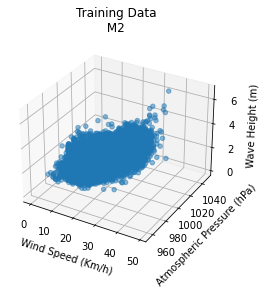

In [58]:
# misc.plot_training_data(input_features=Xm1, target_feature=Ym1, dataset_id='M1', x_label='Wind Speed (Km/h)', y_label='Atmospheric Pressure (hPa)', z_label='Wave Height (m)')
 
misc.plot_training_data(input_features=Xm2, target_feature=Ym2, dataset_id='M2', x_label='Wind Speed (Km/h)', y_label='Atmospheric Pressure (hPa)', z_label='Wave Height (m)')
# misc.plot_training_data(input_features=Xm3, target_feature=Ym3, dataset_id='M3', x_label='Wind Speed (Km/h)', y_label='Atmospheric Pressure (hPa)', z_label='Wave Height (m)')
# misc.plot_training_data(input_features=Xm4, target_feature=Ym4, dataset_id='M4', x_label='Wind Speed (Km/h)', y_label='Atmospheric Pressure (hPa)', z_label='Wave Height (m)')
# misc.plot_training_data(input_features=Xm5, target_feature=Ym5, dataset_id='M5', x_label='Wind Speed (Km/h)', y_label='Atmospheric Pressure (hPa)', z_label='Wave Height (m)')
# misc.plot_training_data(input_features=Xm6, target_feature=Ym6, dataset_id='M6', x_label='Wind Speed (Km/h)', y_label='Atmospheric Pressure (hPa)', z_label='Wave Height (m)')
# misc.plot_training_data(input_features=Xfs1, target_feature=Yfs1, dataset_id='FS1', x_label='Wind Speed (Km/h)', y_label='Atmospheric Pressure (hPa)', z_label='Wave Height (m)')
# misc.plot_training_data(input_features=Xbellmullet, target_feature=Ybellmullet, dataset_id='Bellmullet', x_label='Wind Speed (Km/h)', y_label='Atmospheric Pressure (hPa)', z_label='Wave Height (m)')


In [59]:
# generate test data
max_poly = 3 # any higher order of data makes training take a long time. Training data is large
test_data = misc.genarate_test_values(x_upper=60, x_lower=0, y_upper=940, y_lower=1060, poly_level = max_poly)
# print(np.shape(test_data[:,1]))
# plt.scatter(test_data[:,1],test_data[:,2] )


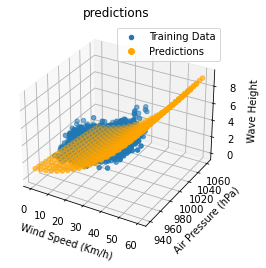

In [60]:
training_data = misc.make_poly_data(X_train, max_poly)
validation_data = misc.make_poly_data(X_test, max_poly)
C_range = [0.001] # bug preventing muliple values
models = ml.train_lasso_for_C(training_data, Y_train, C_range)
# models[0].predict(test_data)
predictions = ml.generate_predictions(model_array=models, test_data= test_data)
misc.plot_predictions(training_data=training_data,target_feature=Y_train,test_data=test_data, predictions=predictions, t = "predictions")

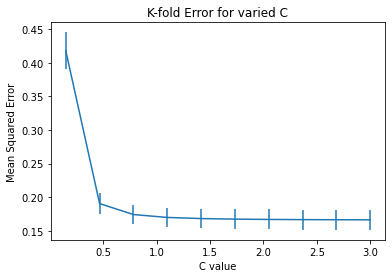

In [61]:
ml.Kfold_for_C_lasso(X, Y,np.linspace(0.15, 3,num=10))
# value of around 0.5

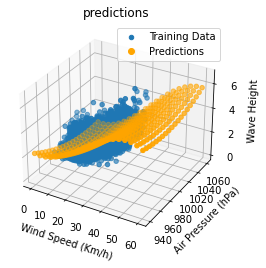

In [62]:
C_range = [0.5] # long training time
lasso_model = ml.train_lasso_for_C(training_data, Y_train, C_range)
# models[0].predict(test_data)
predictions = ml.generate_predictions(model_array=lasso_model, test_data=test_data )
# lasso_predictions = ml.generate_predictions(model_array=models, test_data= X)
misc.plot_predictions(training_data=training_data,target_feature=Y_train,test_data=test_data, predictions=predictions, t = "predictions")

## Ridge Regression

C:\Users\conor\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.36828e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


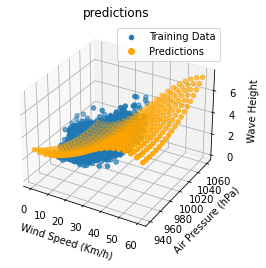

In [63]:
C_range = [0.001] # bug preventing muliple values
models = ml.train_ridge_for_C(training_data, Y_train, C_range)
# models[0].predict(test_data)
predictions = ml.generate_predictions(model_array=models, test_data= test_data)
misc.plot_predictions(training_data=training_data,target_feature=Y_train,test_data=test_data, predictions=predictions, t = "predictions")

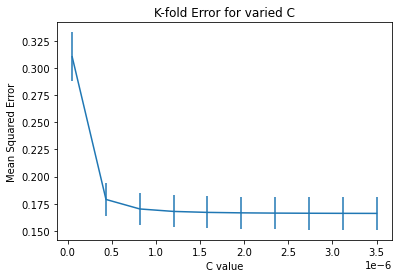

In [64]:
ml.Kfold_for_C_ridge(X, Y,np.linspace(0.00000005, 0.0000035,num=10))
# best to choose a value of 5e-7

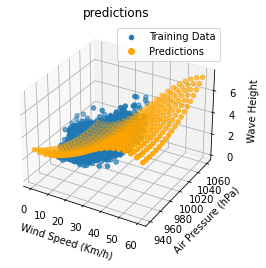

In [67]:
C_range = [5e-7] # bug preventing muliple values
ridge_model = ml.train_ridge_for_C(training_data, Y_train, C_range)
# models[0].predict(test_data)
predictions = ml.generate_predictions(model_array=models, test_data= test_data)
misc.plot_predictions(training_data=training_data,target_feature=Y_train,test_data=test_data, predictions=predictions, t = "predictions")

In [ ]:
dummy_preds = mtr.dummy(X, Y)
lasso_predictions = ml.generate_predictions(model_array=lasso_model, test_data= training_data)
ridge_predictions = ml.generate_predictions(model_array=ridge_model, test_data= training_data)

print(f"Lasso MSE {mtr.calculate_mse(lasso_predictions[0], Y)}") 
print(f"Ridge MSE {mtr.calculate_mse(ridge_predictions[0], Y)}") 
print(f"Dummy MSE {mtr.calculate_mse(dummy_preds, Y)}") 

Lasso MSE 0.14153723199778323
Ridge MSE 0.14119640370352948
Dummy MSE 0.5408862829910279


## get final plots

In [77]:
## lasso train
lt = [ml.train_lasso(training_data,Y_train,0.5)]
lt_preds = ml.generate_predictions(model_array=lt, test_data= training_data)
## lasso validation
lv_preds = ml.generate_predictions(model_array=lt, test_data= validation_data)
## ridge train
rt = [ml.train_ridge(training_data,Y_train,5e-7)]
rt_preds = ml.generate_predictions(model_array=rt, test_data= training_data)
## ridge validation
rv_preds = ml.generate_predictions(model_array=rt, test_data= validation_data)


In [79]:
print(f"Lasso Training MSE {mtr.calculate_mse(lt_preds[0], Y_train)}") 
print(f"Lasso Validation MSE {mtr.calculate_mse(lv_preds[0], Y_test)}") 
print(f"Ridge Training MSE {mtr.calculate_mse(rt_preds[0], Y_train)}") 
print(f"Ridge Validation MSE {mtr.calculate_mse(rv_preds[0], Y_test)}") 
print(f"Dummy MSE {mtr.calculate_mse(dummy_preds, Y)}") 


Lasso Training MSE 0.13988747666670473
Lasso Validation MSE 0.14481696621879056
Ridge Training MSE 0.13954944008967657
Ridge Validation MSE 0.14456429795774012
Dummy MSE 0.5408862829910279


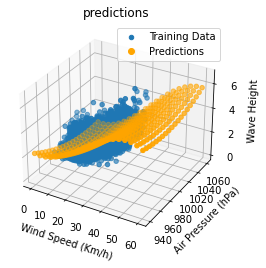

In [80]:
# Lasso Plot
preds = ml.generate_predictions(model_array=lt, test_data=test_data )
misc.plot_predictions(training_data=training_data,target_feature=Y_train,test_data=test_data, predictions=preds, t = "predictions")

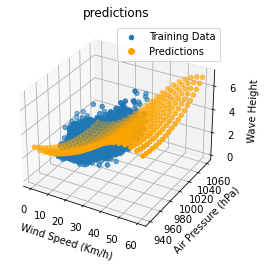

In [81]:
# Ridge Plot
preds = ml.generate_predictions(model_array=rt, test_data=test_data )
misc.plot_predictions(training_data=training_data,target_feature=Y_train,test_data=test_data, predictions=preds, t = "predictions")